In [2]:
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

# Analisis inicial de los datos

In [4]:
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
events.shape

(1011288, 23)

In [6]:
events.isnull().any()

timestamp                   False
event                       False
person                      False
url                          True
sku                          True
model                        True
condition                    True
storage                      True
color                        True
skus                         True
search_term                  True
staticpage                   True
campaign_source              True
search_engine                True
channel                      True
new_vs_returning             True
city                         True
region                       True
country                      True
device_type                  True
screen_resolution            True
operating_system_version     True
browser_version              True
dtype: bool

In [7]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

Con este breve analisis podemos tener una idea de la forma del dataframe, y darnos una idea de la cantidad de datos que disponemos.

In [8]:
#Cambio las variables de tipo categorica y timestamp son fechas
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')
#events['country'] = events['country'].astype('category')
#events['device_type'] = events['device_type'].astype('category')
#events['screen_resolution'] = events['screen_resolution'].astype('category')
#events['operating_system_version'] = events['operating_system_version'].astype('category')
#events['region'] = events['region'].astype('category')
#events['city'] = events['city'].astype('category')

# Analisis de los eventos

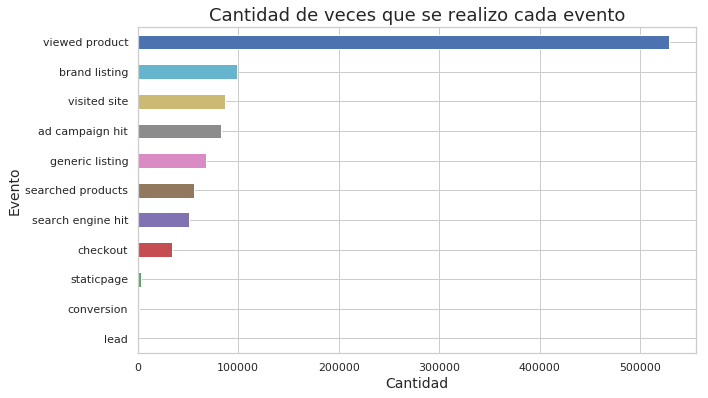

In [14]:
plt.figure(figsize = (10,6))
g = events['event'].value_counts().sort_values().plot(kind='barh', color=sns.color_palette())
g.set_title('Cantidad de veces que se realizo cada evento',Fontsize = 18)
g.set_ylabel('Evento',Fontsize = 14)
g.set_xlabel('Cantidad',Fontsize = 14);
plt.savefig('eventos_realizaciones.png')

## Campañas de publicidad

In [10]:
#que campañas se estan usandando y cuales conviene pagar? (si es que son pagas)
campain_hit = events[events['event'] == 'ad campaign hit']
campain_hit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82827 entries, 0 to 1011285
Data columns (total 23 columns):
timestamp                   82827 non-null datetime64[ns]
event                       82827 non-null category
person                      82827 non-null object
url                         82756 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             82796 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 n

In [11]:
campain_hit = campain_hit[['timestamp','person','url','campaign_source']] #no se esta usando ni las url ni el timestamp por ahora
campain_hit.head()

,timestamp,person,url,campaign_source
0,2018-05-31 23:38:05,0004b0a2,/comprar/iphone/iphone-5s,criteo
6,2018-05-29 13:29:27,0006a21a,/comprar/samsung/galaxy-s8,criteo
11,2018-04-09 20:12:31,000a54b2,/,google
15,2018-05-24 11:21:07,000a54b2,/,google
99,2018-05-17 00:08:56,0019c395,/comprar/samsung/galaxy-j5,google


In [12]:
campain_hit.groupby('person')['campaign_source'].value_counts().sort_values(ascending = False).head(20)
#raro que halla gente que entro tantas veces desde una campaña, que podriamos decir de esto?

person    campaign_source
a202cfba  google             275
c013417a  google             210
e2b0ce1b  google             131
0b2bff0b  google             110
8fb99250  google             105
f3c1111e  google             105
5af7e2bc  rtbhouse            97
          google              94
875eb866  google              94
3952fd6f  google              94
4f50d6c5  google              91
95b58cd6  google              86
8ade1780  google              86
7433a87f  rtbhouse            84
ff9dc4b8  rtbhouse            80
d9251b63  google              78
a1e1f8ec  google              75
14752aa3  google              73
1a959985  google              72
e32aadb9  google              67
Name: campaign_source, dtype: int64

In [12]:
campain_hit['campaign_source'].value_counts()
#abria que hacer algun grafico pero se puede ver que la campaña de publicidad que mas ayuda es google y apartir de manifest habria que evaluar
#cuanto hay que pagar por la campaña ya que no atrae muchas visitas

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
Google Social           1
socialmedia             1
Name: campaign_source, dtype: int64

## Motor de busquedas

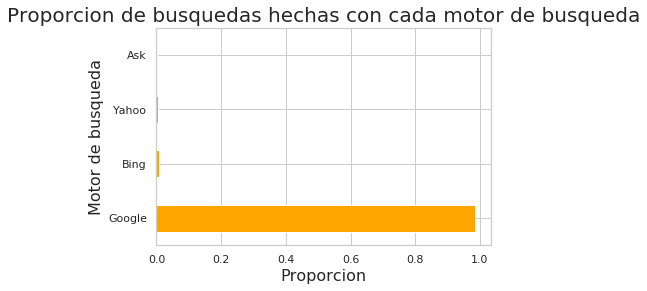

In [13]:
g = events['search_engine'].value_counts(normalize = True).plot(kind = 'barh', color = 'orange')
g.set_title('Proporcion de busquedas hechas con cada motor de busqueda',Fontsize = 20)
g.set_xlabel('Proporcion',Fontsize = 16)
g.set_ylabel('Motor de busqueda',fontsize = 16);

## Channel

In [14]:
events['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

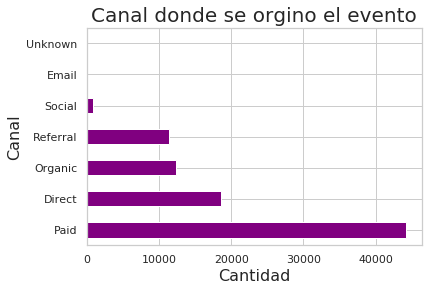

In [15]:
g = events['channel'].value_counts().plot(kind = 'barh', color = 'purple') #no entendi bien a que se refiere con esto el enunciado del tp 
g.set_title('Canal donde se orgino el evento',Fontsize = 20)
g.set_xlabel('Cantidad',Fontsize = 16)
g.set_ylabel('Canal',fontsize = 16);